# An Examination of CAO Points Data 2019 - 2021
## Submission Assignment for Fundamentals of Data Analysis
## GMIT Higher Diploma in Data Analytics
#### Gerry Donnelly November 2021

### Introduction
This assignment is about getting data from websites and being able to analyse that data, all through Python. The specific use case in this instance is the points data contained on the CAO website. The objective of the assignment is to be able to automatically extract the relevant points data for the years 2019, 2020 and 2021 and complete an analysis of that data, comparing each of the years and assessing what are the key trends that emerge from the data. 

The CAO or Central Applications Office is the body that processes all applications for third level educational institutions that are part of the Irish Higher Education system (HEI's). Students sit the Leaving Certificate exam, i.e. the final assessment of second level education and on the basis of results in each subject taken are awarded points. The sum total of points achieved are used by the HEI's to make course offers to students on the basis of their overall points tally and their prior stated course preferences. All of the third level course offers to students are then made thorugh the CAO.

The CAO was instituted in 1977 and it is interesting to note that from a starting point of just 5 HEI's in 1977 and just under 15 thousand applicants it has grown steadily since then to reach 37 HEI's and in excess of 80 thousand applicants in 2021. The number of courses offered has gone from 69 in 1977 to over 1000 in 2021. [CAO Media Stats](http://www.cao.ie/index.php?page=mediapack&bb=mediastats)

While not considered in this assignment the growth, changes in the scale and course profiles offered by the CAO since its inception in 1977 provides an interesting insight into wider societal changes. Over this period Ireland has transformed itself from a largely rural and small scale industrial profile to one where some of the giants of 21st century global industry are happy to operate here. For example, one can only marvel at the scale of the site currently under construction at Intel in Leixlip, a scene unrecognisable to the leaving cert cohort of 1977 but entirely in keeping with the skillsets emerging from our 21st century education system.

On a narrower, but no less interesting time scale, i.e. 2019 - 2021, it will be interesting to see how the impact of a global pandemic and the complete upheaval of the education system during this period may be reflected in the CAO points trends over the three years. Apart from the mechanics of getting at the data, this will be the primary outcome of this assignment. 

### Assignment Outline

The assignment will be tackled in the following stages:
- Accessing and extracting the 2019 - 2021 points data from the CAO Website
- Creating a single pandas dataframe to hold all of the data.
- Use of the pandas dataframe to analyse the points data across the 3 years. 
- Use of plots to demonstrate the essential elements of the analysis.

In terms of assignment scope in relation to the data following should be noted:
- The analysis will be confined to the points data for first round offers for **Level 8** courses only. While it is recognised that Levels 6 and 7 courses play an important role in higher education the clearest indicators of pandemic impacts are at the Level 8 courses. 
- To provide meaningful year on year comparisons the analysis will also be restricted to those courses that appear in all three years, the logic being this is the best way to see the year on year trends. I will use 2019 as the base year. 


### Section 1 - Getting the Data. 
All the CAO points data is contained on the CAO website with links for each year going back to 1998. 

Initial Observations on the points Data
- For some reason the CAO do not appear to maintain a consistent approach to providing the annual points data. This provides some interesting challenges to get the data.
- Points 2019. The data is contained in a PDF document which requires additional steps to convert to a form useable in a pandas dataframe. 
- Points 2020. The data is contained in a Excel .xlsx format which can be used directly to import to a dataframe.  
- Points 2021. The data is now contained in an Excel .xlsx file, previously it was contained only in a web page.

However there are some common characteristics to the data common across all years that will form an important part of the extraction, transformations and analysis:
- Every Level 8 course is assigned a 5 character code, example *DC120 - Computing for Business.*
    - The first 2 characters are alphabetic and indicate the college, in the above example DC refers to Dublin City University.
    - The three digits indicate the course.
- In general the datasets contain course codes, course names, college names and points for each course, being initial offers and subsequect offer rounds. 

In addition all courses are alos assigned to an ISCED classification. [Link to ISCED Description](https://en.wikipedia.org/wiki/International_Standard_Classification_of_Education). This classification system, designed in the early 1970's and substantially updated in 1997 and 2011 serves to provide a standard international classification system across all educational levels in all counrties. It allows for course and course level comparibility within countries and internationally. The ISCED 2011 has been adopted across the EU since 2014 and the revised classification of fields of education and training ISCED-F-2013 has been implemented on education systems data collection since 2014/2015. [Link to ISCED Eurostat](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=International_Standard_Classification_of_Education_(ISCED)#Implementation_of_ISCED_2011_.28levels_of_education.29).

For example in ISCED-F 2013 **06** defines the field of Information and Communication Technologies and in the CAO system 061 defines courses allocated to the general subject area of Information and Communication Technologies (ICTs). 

So for a full course classifications example CK411 is a Level 8 course in Data Science and Analytics course offered by University College Cork and is assigned to (061) Information and Communication Technologies (ICTs) for general classification. These classifications will be useful in looking at trends in general areas as against specific courses. 

Another point to note is that the points data also inlcudes additional characters that have to be dealt with, usually appended before or after the numeric digits. It also inlcudes non numeric data.
- The # character signifies that entry to the associated course is also dependant on an additional Test, Interview, Portfolio or Audition, e.g. #700 or #+matric.
- AQA indicates that the course had sufficient places to offer to all qualified applicants so no points data is provided. 
- The * character indicates that not all applicants achieveing the points score were offered places, final selection usually by lottery. 
- n/a characters, likely to indicate that there were no applicants or the course was not offered. 

For the purpose of the assignment I will start with the 2021 data and work backwards. Overall my objective is to get each of the years data and combine all to one data frame. The basic structure of this final dataset will be course code, course name, course category, college name, points, year. 

#### CAO Points 2021
As stated above the 2021 points data can be found at 

http://www.cao.ie/index.php?page=points&p=2021. 

Initial inspection of the file shows that the row headers are in row 12 of the file so when importing will ignore rows 1 - 11. 

In [1]:
# Import the python packages.
import re
import pandas as pd

# Import the web requests library
import requests as rq

# Import the datetime library, will use for timestamping files
import datetime as dt

# Import os library, will use this to generate folder paths for saving files. 
import os

from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
# Set up the url for the 2020 points data.It is already in excel format.
cao2021url = 'http://www2.cao.ie/points/CAOPointsCharts2021.xlsx'

In [3]:
# Read in the excel file for the 2021 points data, ignoring rows 1 - 11, get a first look at the data. 
df2021 = pd.read_excel(cao2021url, skiprows=11, usecols='A:O')
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   CATEGORY (ISCED Description)  1451 non-null   object
 1   Course Title                  1451 non-null   object
 2   Course Code                   1451 non-null   object
 3   R1 Points                     1416 non-null   object
 4   R1 Random                     83 non-null     object
 5   R2 Points                     384 non-null    object
 6   R2 Random                     52 non-null     object
 7   EOS Points                    1422 non-null   object
 8   EOS Random                    74 non-null     object
 9   EOS Midpoints                 1433 non-null   object
 10  Course Level                  1451 non-null   int64 
 11  HEI                           1451 non-null   object
 12  Test/Interview                119 non-null    object
 13  AVP               

The above information describes the dataframe, some initial observations:
- All the data types except for Course level are are of type object, indicating either text or a mixture of text and numeric.
- Will need to get the R1 Points into a numerical object type. 
- While there are 1451 records there are only 1416 non-null records in the R1 points, will have to see what these are. 

In [4]:
# Apart form that the data looks ok, the 1451 rows and 15 columns matches with what is in the excel file. 
df2021.head()

,CATEGORY (ISCED Description),Course Title,Course Code,R1 Points,R1 Random,R2 Points,R2 Random,EOS Points,EOS Random,EOS Midpoints,Course Level,HEI,Test/Interview,AVP,v
0,Engineering and engineering trades,Music and Instrument Technology,AL605,211,NaN,NaN,NaN,211,NaN,319,6,Athlone Institute of Technology,NaN,NaN,NaN
1,Health,Pharmacy Technician,AL630,308,NaN,NaN,NaN,308,NaN,409,6,Athlone Institute of Technology,NaN,NaN,NaN
2,Health,Dental Nursing,AL631,311,NaN,NaN,NaN,311,NaN,400,6,Athlone Institute of Technology,NaN,NaN,NaN
3,Biological and related sciences,Applied Science,AL632,297,NaN,NaN,NaN,297,NaN,454,6,Athlone Institute of Technology,NaN,NaN,NaN
4,Business and administration,Business,AL650,AQA,NaN,AQA,NaN,AQA,NaN,351,6,Athlone Institute of Technology,NaN,avp,NaN


In [5]:
# Save the original file.
df2021.to_csv('./CAO_Data/cao21_orig.csv',index=False)

In [6]:
# Next step is to create a Level 8 file only, so will extract the Level 8 courses only using the Course Level column. 
df2021_lvl8 = df2021[df2021['Course Level']==8]
df2021_lvl8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034 entries, 29 to 1450
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   CATEGORY (ISCED Description)  1034 non-null   object
 1   Course Title                  1034 non-null   object
 2   Course Code                   1034 non-null   object
 3   R1 Points                     1007 non-null   object
 4   R1 Random                     82 non-null     object
 5   R2 Points                     261 non-null    object
 6   R2 Random                     51 non-null     object
 7   EOS Points                    1012 non-null   object
 8   EOS Random                    74 non-null     object
 9   EOS Midpoints                 1016 non-null   object
 10  Course Level                  1034 non-null   int64 
 11  HEI                           1034 non-null   object
 12  Test/Interview                99 non-null     object
 13  AVP              

Now we have the level 8 courses only, looks like 27 of the R1 points are null. Good news is that the essential columns; Category, Course Title, Course Code, Course Level and HEI all have 1034 records. 

In [7]:
# Have a look at the courses that have no R1 Points data, not sure why so, maybe no applicants, anyway these will be excluded from the analysis. 
nullpoints_21 = pd.isnull(df2021_lvl8['R1 Points'])
df2021_lvl8[nullpoints_21].head(5)

,CATEGORY (ISCED Description),Course Title,Course Code,R1 Points,R1 Random,R2 Points,R2 Random,EOS Points,EOS Random,EOS Midpoints,Course Level,HEI,Test/Interview,AVP,v
34,Architecture and construction,Civil Engineering,AL811,NaN,NaN,NaN,NaN,NaN,NaN,0,8,Athlone Institute of Technology,NaN,NaN,NaN
67,Information and Communication Technologies (ICTs),Creative Computing and Digital Innovation,CW048,NaN,NaN,NaN,NaN,NaN,NaN,0,8,"Institute of Technology, Carlow",NaN,NaN,NaN
221,Welfare,Social Work - Mature Applicants only,CK115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,University College Cork (NUI),NaN,NaN,NaN
287,Information and Communication Technologies (ICTs),Computing (Cloud Computing),DB501,NaN,NaN,178,NaN,178,NaN,309,8,Dublin Business School,NaN,avp,NaN
289,Information and Communication Technologies (ICTs),Computing (Software Development),DB503,NaN,NaN,NaN,NaN,NaN,NaN,0,8,Dublin Business School,NaN,NaN,NaN


In [8]:
# Get only the courses that have data in the R1 points column, will have a look further to see if they all have valid points data.
notnullr1 = pd.notnull(df2021_lvl8['R1 Points'])
df2021_lvl8 = df2021_lvl8[notnullr1]
df2021_lvl8.head()

,CATEGORY (ISCED Description),Course Title,Course Code,R1 Points,R1 Random,R2 Points,R2 Random,EOS Points,EOS Random,EOS Midpoints,Course Level,HEI,Test/Interview,AVP,v
29,Information and Communication Technologies (ICTs),Software Design for Virtual Reality and Gaming,AL801,300,NaN,NaN,NaN,300,NaN,359,8,Athlone Institute of Technology,NaN,NaN,NaN
30,Information and Communication Technologies (ICTs),Software Design in Artificial Intelligence for...,AL802,313,NaN,NaN,NaN,313,NaN,381,8,Athlone Institute of Technology,NaN,NaN,NaN
31,Information and Communication Technologies (ICTs),Software Design for Mobile Apps and Connected ...,AL803,350,NaN,NaN,NaN,350,NaN,398,8,Athlone Institute of Technology,NaN,NaN,NaN
32,Information and Communication Technologies (ICTs),Computer Engineering for Network Infrastructure,AL805,321,NaN,NaN,NaN,321,NaN,381,8,Athlone Institute of Technology,NaN,NaN,NaN
33,Architecture and construction,Quantity Surveying,AL810,328,NaN,NaN,NaN,328,NaN,377,8,Athlone Institute of Technology,NaN,NaN,NaN


In [9]:
# Rename the CATEGORY (ISCED Description) to just ISCED.
df2021_lvl8=df2021_lvl8.rename(columns={'CATEGORY (ISCED Description)': 'ISCED'})

In [10]:
# Extract the first 2 characters from the Course Code to create the 2 Letter HEI Code, these are unique for each institution.  
df2021_lvl8['HEI Code'] = df2021_lvl8['Course Code'].str[:2]

In [11]:
# Pick out just the columns needed for the analysis. 
df2021_lvl8 = df2021_lvl8[['Course Code', 'Course Title', 'HEI Code', 'HEI', 'ISCED', 'R1 Points']]

In [12]:
# Add the year identifier for 2021.
df2021_lvl8['Year']=str(2021)

In [13]:
# This is final version of the 2021 points data that will be used. 
df2021_lvl8.head()

,Course Code,Course Title,HEI Code,HEI,ISCED,R1 Points,Year
29,AL801,Software Design for Virtual Reality and Gaming,AL,Athlone Institute of Technology,Information and Communication Technologies (ICTs),300,2021
30,AL802,Software Design in Artificial Intelligence for...,AL,Athlone Institute of Technology,Information and Communication Technologies (ICTs),313,2021
31,AL803,Software Design for Mobile Apps and Connected ...,AL,Athlone Institute of Technology,Information and Communication Technologies (ICTs),350,2021
32,AL805,Computer Engineering for Network Infrastructure,AL,Athlone Institute of Technology,Information and Communication Technologies (ICTs),321,2021
33,AL810,Quantity Surveying,AL,Athlone Institute of Technology,Architecture and construction,328,2021


In [14]:
# Use os.cwd to generate the current working directory for saving the output files from the analysis.
cwd = os.getcwd()
print(cwd)

C:\Users\donne\OneDrive\Documents\GMIT Data\Fundamentals of Data Analysis\Assessment\data_analysis_assessment\cao_assignment


In [15]:
# Set up the 2021 points file for saving. 
now = dt.datetime.now()
path = cwd + '/CAO_Data'+'/cao2021_' + now.strftime('%Y%m%d_%H%M%S')+'.csv'
#path = cwd + '/CAO_Data'+'/cao2021.csv'
print(path)

C:\Users\donne\OneDrive\Documents\GMIT Data\Fundamentals of Data Analysis\Assessment\data_analysis_assessment\cao_assignment/CAO_Data/cao2021_20211221_155317.csv


In [16]:
# Save the file for 2021. 
df2021_lvl8.to_csv(path, index=False)

***

#### CAO Points 2020

Moving on now to the 2020 points data, will follow a similar approach to that of 2021. 

The link to the data is shown below:

http://www2.cao.ie/points/CAOPointsCharts2020.xlsx

In [17]:
# Set up the url for the 2020 points data.It is already in excel formst.
cao2020url = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

In [18]:
# Read in the excel file for the 2020 points data. In this file the header row in in row 11 so skip the first 10 rows. 
df2020 = pd.read_excel(cao2020url, skiprows=10, usecols='A:O')
df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   CATEGORY (i.e.ISCED description)  1464 non-null   object
 1   COURSE TITLE                      1464 non-null   object
 2   COURSE CODE2                      1464 non-null   object
 3   R1 POINTS                         1437 non-null   object
 4   R1 Random *                       59 non-null     object
 5   R2 POINTS                         333 non-null    object
 6   R2 Random*                        29 non-null     object
 7   EOS                               1448 non-null   object
 8   EOS Random *                      69 non-null     object
 9   EOS Mid-point                     1437 non-null   object
 10  LEVEL                             1464 non-null   int64 
 11  HEI                               1464 non-null   object
 12  Test/Interview #    

Layout and object types same as 2021 data, will proceed in same way to create the dataframe needed. 

In [19]:
# Save the original file.
df2020.to_csv('./CAO_Data/cao20_orig.csv',index=False)

In [20]:
#Get and check the level 8 courses only. 
df2020_lvl8 = df2020[df2020['LEVEL']==8]
df2020_lvl8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027 entries, 0 to 1463
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   CATEGORY (i.e.ISCED description)  1027 non-null   object
 1   COURSE TITLE                      1027 non-null   object
 2   COURSE CODE2                      1027 non-null   object
 3   R1 POINTS                         1008 non-null   object
 4   R1 Random *                       58 non-null     object
 5   R2 POINTS                         212 non-null    object
 6   R2 Random*                        29 non-null     object
 7   EOS                               1014 non-null   object
 8   EOS Random *                      69 non-null     object
 9   EOS Mid-point                     1003 non-null   object
 10  LEVEL                             1027 non-null   int64 
 11  HEI                               1027 non-null   object
 12  Test/Interview #    

In [21]:
# Have a look at the 2020 courses that have no R1 Points data, not sure why so, maybe no applicants, anyway these will be excluded from the analysis. 
nullpoints_20 = pd.isnull(df2020_lvl8['R1 POINTS'])
# There are 19 courses with no points. 
df2020_lvl8[nullpoints_20].head(5)

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,LEVEL,HEI,Test/Interview #,avp,v
97,Welfare,Social Science (Youth and Community Work) - 3 ...,CK114,NaN,NaN,NaN,NaN,777,NaN,NaN,8,University College Cork (NUI),#,NaN,NaN
98,Welfare,Social Work - Mature Applicants only,CK115,NaN,NaN,NaN,NaN,999,NaN,NaN,8,University College Cork (NUI),NaN,NaN,NaN
151,Education,Education - Primary Teaching - Gaeltacht Appli...,CM002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,Marino Institute of Education,#,NaN,NaN
309,Information and Communication Technologies (ICTs),Computing (Web and Mobile Technology),DB504,NaN,NaN,281,NaN,281,NaN,281,8,Dublin Business School,NaN,avp,NaN
314,Business and administration,Financial Services,DB516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,Dublin Business School,NaN,NaN,NaN


In [22]:
# Get only the 2020 courses that have data in the R1 points column, will have a look further to see if they are all valid points data.
notnullr1 = pd.notnull(df2020_lvl8['R1 POINTS'])
df2020_lvl8 = df2020_lvl8[notnullr1]
df2020_lvl8.head()

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,LEVEL,HEI,Test/Interview #,avp,v
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,8,American College,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,8,American College,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,8,National College of Art and Design,#,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,8,National College of Art and Design,#,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,8,National College of Art and Design,#,NaN,NaN


In [23]:
# Rename the Columns to the standard list. 
df2020_lvl8=df2020_lvl8.rename(columns={'COURSE CODE2':'Course Code', 'COURSE TITLE':'Course Title','CATEGORY (i.e.ISCED description)': 'ISCED', 'R1 POINTS':'R1 Points'})

In [24]:
# Put in the 2 Letter HEI Code.
df2020_lvl8['HEI Code'] = df2020_lvl8['Course Code'].str[:2]

In [25]:
# Pick out the columns needed for the analysis. 
df2020_lvl8 = df2020_lvl8[['Course Code', 'Course Title', 'HEI Code', 'HEI', 'ISCED', 'R1 Points']]

In [26]:
# Add the year identifier for 2020.
df2020_lvl8['Year']=str(2020)
df2020_lvl8.head()

,Course Code,Course Title,HEI Code,HEI,ISCED,R1 Points,Year
0,AC120,International Business,AC,American College,Business and administration,209,2020
1,AC137,Liberal Arts,AC,American College,Humanities (except languages),252,2020
2,AD101,"First Year Art & Design (Common Entry,portfolio)",AD,National College of Art and Design,Arts,#+matric,2020
3,AD102,Graphic Design and Moving Image Design (portfo...,AD,National College of Art and Design,Arts,#+matric,2020
4,AD103,Textile & Surface Design and Jewellery & Objec...,AD,National College of Art and Design,Arts,#+matric,2020


In [27]:
# Save the file for 2020 Points.
path = cwd + '/CAO_Data'+'/cao2020_' + now.strftime('%Y%m%d_%H%M%S')+'.csv'
df2020_lvl8.to_csv(path, index=False)

In [28]:
# Creating a table of unique HEI codes and institutions, will use later for lookups.
df20_21 = pd.concat([df2021_lvl8,df2020_lvl8])
hei_table = df20_21[['HEI Code','HEI']].drop_duplicates()
hei_table.head(5)

,HEI Code,HEI
29,AL,Athlone Institute of Technology
61,CW,"Institute of Technology, Carlow"
132,PC,"Carlow College, St. Patrick`s"
159,CR,Cork Institute of Technology
209,CK,University College Cork (NUI)


***

#### CAO Points 2019

Moving on now to the 2019 points data, this is somewhat trickier as the CAO for whatever reason only have it available in a .pdf format. 

In [29]:
# Set up the url for the 2019 points data, note it is a .pdf file so additional steps will be needed to get at the data. 
cao2019url = 'http://www2.cao.ie/points/lvl8_19.pdf'

Steps used to extract the 2019 points data from the CAO .pdf file.

There are a number of ways to turn the pdf file into excel. To save time following was done and can easily be replicated.

- Open the file from the link above in Chrome browser.
- The built in Adobe Acrobat Chrome extension has a selection of file conversion tools, one of which is **pdf to excel** conversion.
- The resulting excel file opens in the browser and can be downloaded to a system folder, in this case to a folder named CAO_Data.
- The file as downloaded is structured in sections, with a section for each HEI, however the HEI information does not appear at the individual row level for each course but as a header for the section. 
- For the purpose of this project I have deleted the HEI header rows directly in the excel file.
- The file also does not contain any ISCED data. 

On further examination of the file that has been downloaded there are 111 courses that do not appear in either 2020 or 2021, they relate to courses with college code DT (Technological University Dublin City Campus), BN (Technological University Dublin Blanchardstown Campus) and TA (Technological University Dublin Tallaght Campus). In 2020 and 2021 the courses under these college codes appear to have been amalgamated into a common college code of TU, Technological University Dublin. However there is no relationship between the original 2019 Course Codes and the New 2020 and 2021 Course Codes. What I will attempt to do is to match the 2019 points data with the 2020 and 2021 course information using the course descriptions as the match, not ideal but only way I can see any link between them.  

In [30]:
# Read in the 2019 points excel file, note this file contains only Level 8 courses. 
# The file also is missing the row level details for the HEI Name and ISCED Category.
# The R1 points data is in a columns named EOS.
# Create a College Code from the first 2 letters of the Course Code, can use this to get the College Name. 
df2019_lvl8 = pd.read_excel('./CAO_Data/lvl8_2019.xlsx')
df2019_lvl8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Course Code  930 non-null    object 
 1   Course       930 non-null    object 
 2   EOS          926 non-null    object 
 3   Mid          915 non-null    float64
dtypes: float64(1), object(3)
memory usage: 29.2+ KB


In [31]:
# Have a look at the courses with null R1 values. There are 4 of them. 
nullpoints_19 = pd.isnull(df2019_lvl8['EOS'])
df2019_lvl8[nullpoints_19]

,Course Code,Course,EOS,Mid
366,GC462,Design Communication (Dublin),NaN,NaN
371,ID003,Business Studies with Chinese,NaN,NaN
877,TL842,Construction Management,NaN,NaN
880,TL847,Manufacturing Engineering,NaN,NaN


In [32]:
# Remove the null value courses.
notnullr1 = pd.notnull(df2019_lvl8['EOS'])
df2019_lvl8 = df2019_lvl8[notnullr1]

In [33]:
# Need to Create a HEI code to get the College Name information. Use the first 2 Characters of the Course Code for this and create a new Column.  
df2019_lvl8['HEI Code'] = df2019_lvl8['Course Code'].str[:2]
df2019_lvl8.head(5)

,Course Code,Course,EOS,Mid,HEI Code
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0,AL
1,AL802,Software Design with Cloud Computing,301,306.0,AL
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0,AL
3,AL805,Network Management and Cloud Infrastructure,329,442.0,AL
4,AL810,Quantity Surveying,307,349.0,AL


In [34]:
# Temporary dataframe to get the HEI details and ISCED Category from the 2020 file. 
df=pd.merge(df2019_lvl8, df2020_lvl8[['Course Code','HEI','ISCED']], on='Course Code', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 926 entries, 0 to 925
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Course Code  926 non-null    object 
 1   Course       926 non-null    object 
 2   EOS          926 non-null    object 
 3   Mid          915 non-null    float64
 4   HEI Code     926 non-null    object 
 5   HEI          777 non-null    object 
 6   ISCED        777 non-null    object 
dtypes: float64(1), object(6)
memory usage: 57.9+ KB


In [35]:
# Now use the HEI Table created earlier to get the HEI College names. 
df=pd.merge(df, hei_table[['HEI Code','HEI']], on='HEI Code', how='left')
df.head(5)

,Course Code,Course,EOS,Mid,HEI Code,HEI_x,ISCED,HEI_y
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0,AL,Athlone Institute of Technology,Information and Communication Technologies (ICTs),Athlone Institute of Technology
1,AL802,Software Design with Cloud Computing,301,306.0,AL,Athlone Institute of Technology,Information and Communication Technologies (ICTs),Athlone Institute of Technology
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0,AL,Athlone Institute of Technology,Information and Communication Technologies (ICTs),Athlone Institute of Technology
3,AL805,Network Management and Cloud Infrastructure,329,442.0,AL,Athlone Institute of Technology,Information and Communication Technologies (ICTs),Athlone Institute of Technology
4,AL810,Quantity Surveying,307,349.0,AL,Athlone Institute of Technology,Architecture and construction,Athlone Institute of Technology


In [36]:
# Get the 2019 data into the standard format.
df2019_lvl8 =df[['Course Code', 'Course', 'HEI Code', 'HEI_y', 'ISCED', 'EOS']]
df2019_lvl8 = df2019_lvl8.rename(columns={'Course':'Course Title','HEI_y':'HEI','EOS':'R1 Points'})
df2019_lvl8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 926 entries, 0 to 925
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Course Code   926 non-null    object
 1   Course Title  926 non-null    object
 2   HEI Code      926 non-null    object
 3   HEI           815 non-null    object
 4   ISCED         777 non-null    object
 5   R1 Points     926 non-null    object
dtypes: object(6)
memory usage: 50.6+ KB


In [37]:
# Add in the year identifier for 2019.
df2019_lvl8['Year']=str(2019)
df2019_lvl8.head()

,Course Code,Course Title,HEI Code,HEI,ISCED,R1 Points,Year
0,AL801,Software Design with Virtual Reality and Gaming,AL,Athlone Institute of Technology,Information and Communication Technologies (ICTs),304,2019
1,AL802,Software Design with Cloud Computing,AL,Athlone Institute of Technology,Information and Communication Technologies (ICTs),301,2019
2,AL803,Software Design with Mobile Apps and Connected...,AL,Athlone Institute of Technology,Information and Communication Technologies (ICTs),309,2019
3,AL805,Network Management and Cloud Infrastructure,AL,Athlone Institute of Technology,Information and Communication Technologies (ICTs),329,2019
4,AL810,Quantity Surveying,AL,Athlone Institute of Technology,Architecture and construction,307,2019


In [38]:
# Check the R1 points, have a look at any that dont begin with and contain only numbers from 0 - 9.
# Will fix these later in the consolidated file. 
df2019_lvl8[df2019_lvl8['R1 Points'].str.contains('^\d')==False]

,Course Code,Course Title,HEI Code,HEI,ISCED,R1 Points,Year
23,AL861,Animation and Illustration (portfolio),AL,Athlone Institute of Technology,Arts,#615,2019
24,AL863,Graphic and Digital Design (portfolio),AL,Athlone Institute of Technology,Arts,#703,2019
29,CW038,"Art (portfolio, Wexford)",CW,"Institute of Technology, Carlow",Arts,#700,2019
56,CW858,"Sports Management and Coaching (options, portf...",CW,"Institute of Technology, Carlow",Personal services,#700,2019
70,CR121,Music at CIT Cork School of Music,CR,Cork Institute of Technology,Arts,#633,2019
...,...,...,...,...,...,...,...
825,MH802,"Community and Youth Work (part-time, in service",MH,Maynooth University,Welfare,#,2019
826,MH803,"Local Studies or Community Studies (part-time,...",MH,Maynooth University,Social and behavioural sciences,#,2019
844,SG244,Fine Art,SG,"Institute of Technology, Sligo",Arts,#355,2019
886,TL889,Counselling with Addiction - Mature applicants...,TL,"Institute of Technology, Tralee",NaN,#,2019


In [39]:
# Save the 2019 file. 
path = cwd + '/CAO_Data'+'/cao2019_' + now.strftime('%Y%m%d_%H%M%S')+'.csv'
df2019_lvl8.to_csv(path, index=False)

In [40]:
# Now that they are are all in the standard can join the 2019, 2020 and 2021 files.
allcourses = pd.concat([df2021_lvl8,df2020_lvl8, df2019_lvl8])
allcourses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2941 entries, 29 to 925
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Course Code   2941 non-null   object
 1   Course Title  2941 non-null   object
 2   HEI Code      2941 non-null   object
 3   HEI           2830 non-null   object
 4   ISCED         2792 non-null   object
 5   R1 Points     2941 non-null   object
 6   Year          2941 non-null   object
dtypes: object(7)
memory usage: 183.8+ KB


In the consolidated file looks like there are quite a few records missing the HEI indicator, there are 2941 HEI codes but 2830 HEI descriptions.

111 of these relate to the issue described above with the Technological University of Dublin. In the next section will attempt to fix these by using the course descriptions to create a link between them. 

In [41]:
# This is the list courses that have moved from the BN, DT, TA course codes in 2019 to the TU codes in 2020 and 2021.
tulist=['BN','DT','TA']
result_tu=df2019_lvl8[df2019_lvl8['HEI Code'].isin(tulist)]
result_tu

,Course Code,Course Title,HEI Code,HEI,ISCED,R1 Points,Year
265,DT001,Product Design,DT,NaN,NaN,433,2019
266,DT028,Transport Operations and Technology,DT,NaN,NaN,279,2019
267,DT035,Electrical Services and Energy Management,DT,NaN,NaN,293,2019
268,DT066,Engineering (General Entry),DT,NaN,NaN,400,2019
269,DT101,Architecture (test and interview),DT,NaN,NaN,#618,2019
...,...,...,...,...,...,...,...
407,TA323,Computing with IT Management,TA,NaN,NaN,243,2019
408,TA326,DNA and Forensic Analysis,TA,NaN,NaN,300,2019
409,TA327,Sports Science and Health,TA,NaN,NaN,341,2019
410,TA328,Computing with Language (French/German/Spanish),TA,NaN,NaN,218,2019


In [42]:
# Need to create a list of the TU courses only, try to match on Course Description.
# Join the 2020 and 2021 frames.
tu_courses = pd.concat([df2021_lvl8,df2020_lvl8])
# Pull out the TU course codes only.
tu_courses=tu_courses[tu_courses['HEI Code']=='TU']
# Drop duplicates to get a single list. 
tu_unique=tu_courses.drop_duplicates(['Course Code'])
# This is the list of TU Courses. 
tu_unique

,Course Code,Course Title,HEI Code,HEI,ISCED,R1 Points,Year
528,TU801,Sustainable Energy Engineering,TU,Technological University Dublin,Environment,235,2021
529,TU802,Electrical Services and Energy Management,TU,Technological University Dublin,Engineering and engineering trades,309,2021
530,TU804,Engineering (Common Entry with Award options),TU,Technological University Dublin,Engineering and engineering trades,270,2021
531,TU805,Engineering (General Entry),TU,Technological University Dublin,Engineering and engineering trades,466,2021
532,TU807,Computer Engineering in Mobile Systems,TU,Technological University Dublin,Engineering and engineering trades,274,2021
...,...,...,...,...,...,...,...
1380,TU971,Contemporary Visual Culture,TU,Technological University Dublin,Arts,290,2020
1381,TU972,Creative and Cultural Industries,TU,Technological University Dublin,Arts,281,2020
1391,TU986,Print Media Technology and Management,TU,Technological University Dublin,Business and administration,289,2020
1394,TU993,Early Childhood Care and Education,TU,Technological University Dublin,Welfare,270,2020


In [43]:
# Create a dataframe that merges the 2019 courses with the TU courses based on the Course Title. 
# Plan is to end up with the TU Course Code in the 2019 data but keep the 2019 points.
# In this way can use in all three years for analysis purposes. 
# May not get all of the as some course descriptions may have changed.  
result1=pd.merge(result_tu, tu_unique[['Course Code','Course Title','HEI Code','HEI','ISCED', 'R1 Points', 'Year']], on='Course Title', how='left')
result1=result1[result1['HEI Code_y']=='TU']
result1=result1.rename(columns={'Course Code_y':'Course Code', 'Course Title:':'Course Title', 'HEI Code_y': 'HEI Code', 'HEI_y':'HEI', 'ISCED_y':'ISCED', 'R1 Points_x':'R1 Points', 'Year_x':'Year'})
result1=result1[['Course Code', 'Course Title', 'HEI Code', 'HEI', 'ISCED', 'R1 Points', 'Year']]

# This gives the course points for 2019 but with the TU course code added in, looks like got 100 of the 111. 
result1

,Course Code,Course Title,HEI Code,HEI,ISCED,R1 Points,Year
0,TU811,Product Design,TU,Technological University Dublin,Arts,433,2019
2,TU802,Electrical Services and Energy Management,TU,Technological University Dublin,Engineering and engineering trades,293,2019
3,TU805,Engineering (General Entry),TU,Technological University Dublin,Engineering and engineering trades,400,2019
5,TU835,Planning and Environmental Management,TU,Technological University Dublin,Architecture and construction,312,2019
6,TU836,Property Economics (Valuation Surveying),TU,Technological University Dublin,Architecture and construction,367,2019
...,...,...,...,...,...,...,...
112,TU876,Pharmaceutical Science,TU,Technological University Dublin,Biological and related sciences,261,2019
113,TU859,Computing,TU,Technological University Dublin,Information and Communication Technologies (ICTs),200,2019
115,TU864,DNA and Forensic Analysis,TU,Technological University Dublin,Biological and related sciences,300,2019
116,TU936,Sports Science and Health,TU,Technological University Dublin,Biological and related sciences,341,2019


In [44]:
# Drop the BN, DT , TA course codes from the 2019 data, no longer needed, will be replaced with the TU versions.
tulist=['BN','DT','TA']
drop_tu=df2019_lvl8.drop(df2019_lvl8[df2019_lvl8['HEI Code'].isin(tulist)].index)
drop_tu.head()

,Course Code,Course Title,HEI Code,HEI,ISCED,R1 Points,Year
0,AL801,Software Design with Virtual Reality and Gaming,AL,Athlone Institute of Technology,Information and Communication Technologies (ICTs),304,2019
1,AL802,Software Design with Cloud Computing,AL,Athlone Institute of Technology,Information and Communication Technologies (ICTs),301,2019
2,AL803,Software Design with Mobile Apps and Connected...,AL,Athlone Institute of Technology,Information and Communication Technologies (ICTs),309,2019
3,AL805,Network Management and Cloud Infrastructure,AL,Athlone Institute of Technology,Information and Communication Technologies (ICTs),329,2019
4,AL810,Quantity Surveying,AL,Athlone Institute of Technology,Architecture and construction,307,2019


In [45]:
# Now add in the TU versions from the result1 df. 
tu_merge = pd.concat([drop_tu,result1])
df2019_lvl8 = tu_merge
df2019_lvl8.head()

,Course Code,Course Title,HEI Code,HEI,ISCED,R1 Points,Year
0,AL801,Software Design with Virtual Reality and Gaming,AL,Athlone Institute of Technology,Information and Communication Technologies (ICTs),304,2019
1,AL802,Software Design with Cloud Computing,AL,Athlone Institute of Technology,Information and Communication Technologies (ICTs),301,2019
2,AL803,Software Design with Mobile Apps and Connected...,AL,Athlone Institute of Technology,Information and Communication Technologies (ICTs),309,2019
3,AL805,Network Management and Cloud Infrastructure,AL,Athlone Institute of Technology,Information and Communication Technologies (ICTs),329,2019
4,AL810,Quantity Surveying,AL,Athlone Institute of Technology,Architecture and construction,307,2019


In [46]:
# Now that they are are all in the standard can join the reworked 2019 file with the 2020 and 2021 files.
allcourses_final = pd.concat([df2021_lvl8,df2020_lvl8,df2019_lvl8])
allcourses_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 29 to 117
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Course Code   2930 non-null   object
 1   Course Title  2930 non-null   object
 2   HEI Code      2930 non-null   object
 3   HEI           2930 non-null   object
 4   ISCED         2892 non-null   object
 5   R1 Points     2930 non-null   object
 6   Year          2930 non-null   object
dtypes: object(7)
memory usage: 183.1+ KB


In [47]:
# There are 38 courses that do not have an ISCED Category, will try to recover some of these by creating a unique ISCED df.
df = allcourses_final[['Course Code','ISCED']].drop_duplicates(subset='Course Code', keep="first").dropna()

# Get 1082 unique course codes/ISCED, will use this to recover some of the missing ones from the 2019 file. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 29 to 1429
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Course Code  1082 non-null   object
 1   ISCED        1082 non-null   object
dtypes: object(2)
memory usage: 25.4+ KB


In [48]:
# Merge the final file and the ISCED table. 
df_merge=pd.merge(allcourses_final,df[['Course Code','ISCED']], on='Course Code', how='left')

# Looks like get 10 additional ISCED codes from 2892 to 2902.
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 2929
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Course Code   2930 non-null   object
 1   Course Title  2930 non-null   object
 2   HEI Code      2930 non-null   object
 3   HEI           2930 non-null   object
 4   ISCED_x       2892 non-null   object
 5   R1 Points     2930 non-null   object
 6   Year          2930 non-null   object
 7   ISCED_y       2902 non-null   object
dtypes: object(8)
memory usage: 206.0+ KB


In [49]:
# Get rid of the unwanted columns and rename the ISCED column to the standard name.
df_merge1 = df_merge.drop('ISCED_x', axis=1).rename(columns={'ISCED_y':'ISCED'})
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 2929
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Course Code   2930 non-null   object
 1   Course Title  2930 non-null   object
 2   HEI Code      2930 non-null   object
 3   HEI           2930 non-null   object
 4   R1 Points     2930 non-null   object
 5   Year          2930 non-null   object
 6   ISCED         2902 non-null   object
dtypes: object(7)
memory usage: 183.1+ KB


In [50]:
# Will drop the course codes that do not have an ISCED category. 
df_merge1 = df_merge1.dropna()

# Not all courses from the 3 years have made it to here but should be sufficient to see the trends
# across the colleges and categories. 
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2902 entries, 0 to 2929
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Course Code   2902 non-null   object
 1   Course Title  2902 non-null   object
 2   HEI Code      2902 non-null   object
 3   HEI           2902 non-null   object
 4   R1 Points     2902 non-null   object
 5   Year          2902 non-null   object
 6   ISCED         2902 non-null   object
dtypes: object(7)
memory usage: 181.4+ KB


In [51]:
# Creating datafram to deal with the R1 Points data, some of which do not contain any numeric data 
# and some with * or # appended as described in the intro. 
df = df_merge1

In [52]:
# Get rid of the * character from the points data. 
df = df.replace('\*', '', regex=True)

In [53]:
# Get rid of the # character from the points data.
df = df.replace('#','',regex=True)

In [54]:
df.reset_index(drop=True, inplace=True)

In [55]:
#Drop any records that do not have numeric digits in the points data. 
df.drop(df[df['R1 Points'].str.contains('\D', regex=True)==True].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2877 entries, 0 to 2901
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Course Code   2877 non-null   object
 1   Course Title  2877 non-null   object
 2   HEI Code      2877 non-null   object
 3   HEI           2877 non-null   object
 4   R1 Points     2877 non-null   object
 5   Year          2877 non-null   object
 6   ISCED         2877 non-null   object
dtypes: object(7)
memory usage: 179.8+ KB


In [56]:
# Finally write the completed file out to csv in the CAO_Data folder. 
df.to_csv('./CAO_Data/df.csv',index=False)

### CAO Points Analysis
This section reads in the overall points data for the three years and looks at the trends between 2019 and 2021. Given the monumental changes imposed by Covid to the traditional exam based points awards the move to a largely assessment based profile will have an impact. For the purpose of this project I am going to do the comparison between the 2019 pre covid CAO data and the 2021 CAO points data. 

In [57]:
# Read back in from the csv file. 
# Looks like there are 18 records that are null. 
allcourses = pd.read_csv('./CAO_Data/df.csv')
allcourses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2877 entries, 0 to 2876
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Course Code   2877 non-null   object 
 1   Course Title  2877 non-null   object 
 2   HEI Code      2877 non-null   object 
 3   HEI           2877 non-null   object 
 4   R1 Points     2859 non-null   float64
 5   Year          2877 non-null   int64  
 6   ISCED         2877 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 157.5+ KB


In [58]:
# Some minorcleanu, remove the null records. 
allcourses.dropna(inplace=True)
allcourses.reset_index(drop=True, inplace=True)

In [59]:
# Turn year into a string as it is being used as a category not a number.  
allcourses['Year'] = allcourses['Year'].astype(str)

# Make R1 Points type integer. 
allcourses['R1 Points'] = allcourses['R1 Points'].astype(int)
# Final course file for the 3 years with the correct data types. 
allcourses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2859 entries, 0 to 2858
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Course Code   2859 non-null   object
 1   Course Title  2859 non-null   object
 2   HEI Code      2859 non-null   object
 3   HEI           2859 non-null   object
 4   R1 Points     2859 non-null   int32 
 5   Year          2859 non-null   object
 6   ISCED         2859 non-null   object
dtypes: int32(1), object(6)
memory usage: 145.3+ KB


In [60]:
# Output the cleaned file to The datasets folder. 
allcourses.to_csv('./CAO_Data/allcourses.csv',index=False)

In [61]:
# Now have a look at the overall picture by year. 
allcourses.groupby(['Year']).describe()

R1 Points                                                           
         count        mean         std   min    25%    50%    75%     max
Year                                                                     
2019     869.0  375.354430  123.310298  55.0  290.0  348.0  440.0   979.0
2020     989.0  394.300303  126.135161  55.0  301.0  370.0  476.0  1088.0
2021    1001.0  419.503497  133.020593  57.0  307.0  412.0  511.0  1028.0

At an overall level it is clear that there is a significant increase in point levels from 2019 to 2021 with a nearly 20% median increase in the period. This is not unexpected given the revised covid protocols for points awards.  

Below will look at some more details.  

In [71]:
# Have a look now at the picture by course category. 
# Will create a pivot dataframe to have a look at this. The default pivot calculation for the points values is mean.
cao_summary = allcourses.pivot_table(index= ['HEI','ISCED'], columns='Year', values = 'R1 Points', dropna=True)

# Calculate Points difference and difference% between 2021 and 2019. 
cao_summary['diff19_21'] = cao_summary['2021']-cao_summary['2019']
cao_summary['diff%'] = cao_summary['diff19_21']/cao_summary['2019']*100

cao_sort = cao_summary.sort_values(by=['diff%'], ascending=False)
cao_sort.round()
cao_sort.describe()

Year,2019,2020,2021,diff19_21,diff%
count,283.000000,297.000000,304.000000,279.000000,279.000000
mean,360.189632,373.129329,394.509464,33.218797,9.552448
std,91.774282,101.239315,109.227612,43.303352,13.808107
min,185.500000,206.500000,201.000000,-170.726496,-24.186047
25%,295.038462,300.000000,304.000000,7.900000,2.392191
50%,336.500000,349.000000,377.500000,30.189744,8.469055
75%,421.250000,438.875000,482.125000,55.800000,13.846664
max,776.900000,942.000000,993.000000,279.000000,128.571429


In [69]:
# These are the top 10 categories by HEI by diff%. 
cao_sort.nlargest(10,'diff%').round()

,Year,2019,2020,2021,diff19_21,diff%
HEI,ISCED,,,,,
"Dun Laoghaire Institute of Art, Design and Technology",Information and Communication Technologies (ICTs),217.0,451.0,496.0,279.0,129.0
National College of Art and Design,Arts,300.0,377.0,545.0,245.0,82.0
"Institute of Technology, Tralee",Arts,294.0,303.0,520.0,226.0,77.0
Galway-Mayo Institute of Technology,Arts,279.0,392.0,437.0,158.0,56.0
University College Dublin (NUI),Agriculture,361.0,395.0,531.0,170.0,47.0
Limerick Institute of Technology,Health,282.0,294.0,391.0,109.0,39.0
Technological University Dublin,Arts,334.0,464.0,461.0,127.0,38.0
"Carlow College, St. Patrick`s",Humanities (except languages),186.0,254.0,252.0,67.0,36.0
Technological University Dublin,Environment,236.0,292.0,314.0,78.0,33.0


In [63]:
# These are the bottom 10 for diff% for ISCED by HEI 
cao_sort.nsmallest(10,'diff%').round()

,Year,2019,2020,2021,diff19_21,diff%
HEI,ISCED,,,,,
Mary Immaculate College,Arts,322.0,338.0,244.0,-78.0,-24.0
Cork Institute of Technology,Arts,729.0,769.0,558.0,-171.0,-23.0
Technological University Dublin,Education,385.0,367.0,324.0,-61.0,-16.0
"Dun Laoghaire Institute of Art, Design and Technology",Arts,777.0,712.0,666.0,-111.0,-14.0
Dublin Business School,Information and Communication Technologies (ICTs),289.0,283.0,248.0,-41.0,-14.0
Galway-Mayo Institute of Technology,Humanities (except languages),228.0,244.0,201.0,-27.0,-12.0
Cork Institute of Technology,Environment,326.0,286.0,291.0,-36.0,-11.0
Waterford Institute of Technology,Engineering and engineering trades,280.0,270.0,250.0,-30.0,-11.0
Technological University Dublin,Social and behavioural sciences,416.0,372.0,373.0,-43.0,-10.0


In [72]:
# Write this file to the CAO_Datafolder. 
cao_sort.to_csv('./CAO_Data/cao_sort.csv',index=True)

<AxesSubplot:title={'center':'Distribution of CAO Points Increases 2019 - 2021'}, xlabel='diff19_21', ylabel='Count'>

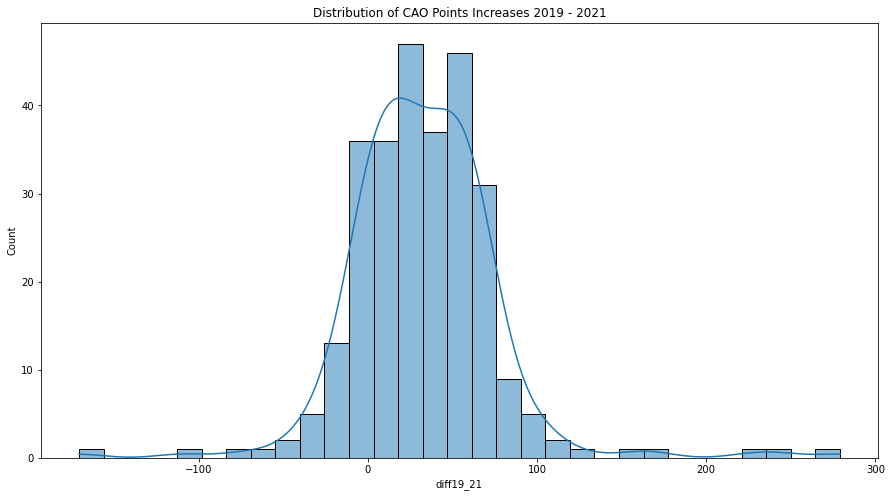

In [75]:
# Plot of the points differences between 2019 and 2021. 
plt.figure(figsize=(15,8))
plt.title('Distribution of CAO Points Increases 2019 - 2021')
sns.histplot(cao_sort, x='diff19_21', kde=True)

<AxesSubplot:title={'center':'Distribution of % Points Differences 2019 - 2021'}, xlabel='diff%', ylabel='Count'>

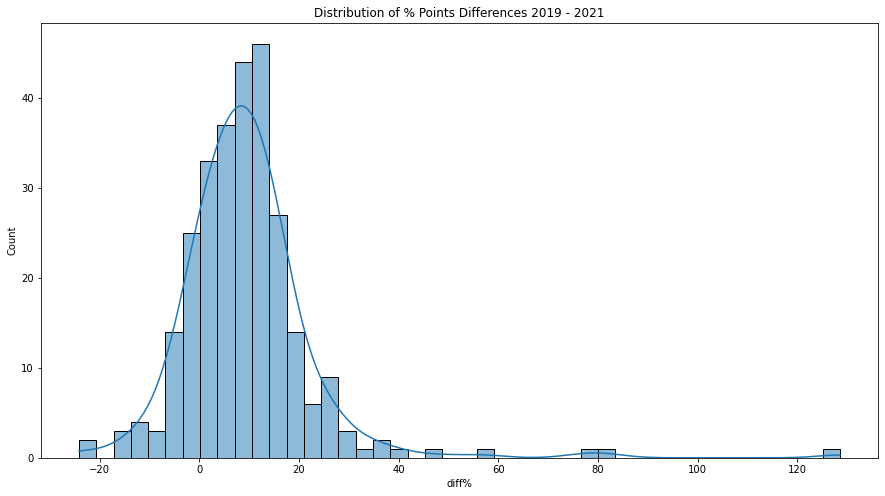

In [76]:
plt.figure(figsize=(15,8))
plt.title('Distribution of % Points Differences 2019 - 2021')
sns.histplot(cao_sort, x='diff%', kde=True)

### Summary and Conclusions
This has been a challenging but worthwhile project that has demonstrated at one level the real world problem for data analysis of getting clean, useable data. What often appears on the surface as a relatively straightforward task can end up being significantly more complicated due a lack of adherance to any concept of data standards in the source data. This is very much the case with the CAO data with significant differences year on year in the data structure and data consistency. 

For the project what is clear from the data and the difference plots above that the differences are very much skewed on the increasing side with a overall mean increase of 33 points and 10% points difference across the board. Looking at the top and bottom categories it is clear that the largest increases are not surprisingly in the universities with the institutes of technology at the opposite end of the scale. This could reflect that students placed more emphasis on university places based on an expectation on getting higher points thorugh the assessment process. Like a rising tide all that happens is the course points levels go up. 